<a href="https://colab.research.google.com/github/karol10542/deep_course/blob/main/Wprowadzenie_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
#ładujemy dane z kerasa
from tensorflow.keras.datasets.mnist import load_data
#pozwala budować modele warstwa po warstwie sekwencyjnie
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
#do interaktywnych wykresow biblioteka plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
#opcja do printowania tablic numpy 
np.set_printoptions(precision=12,suppress=True,linewidth=120)
print(tf.__version__)

2.4.0


In [3]:
#przygotowujemy dane treningowe  oraz testowe z wartoscia domyslna tj 60k danych treningowych o rozm 28x28 oraz 10k testowych o wielkosci 10k

(X_train,y_train),(X_test,y_test) = load_data() #<--- z naszej biblioteki

#drukujemy nasze dane testowe oraz treningowe
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'X_test shape:{y_test.shape}')


X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
X_test shape:(10000,)


In [4]:
#sprawdzmy jeden przyklad z danych treningowych
#wyswietli sie wartosc w tablicy, im wyzsza wartosc tym jasniejszy kolor 28x28 rozmiar odcienie szarosci
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
#sprawdzmy czy na pewno jest to rozmiar 28x28
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [6]:
#teraz bierzemy nasze dane testowe i treningowe aby je wystandaryzowac czyli aby przyjmowaly wartosc 0 albo 255 jest to zabieg ktory przyspieszy dzialanie oraz poprawi widocznosc
X_train = X_train /255.
X_test= X_test /255.

(-0.5, 27.5, 27.5, -0.5)

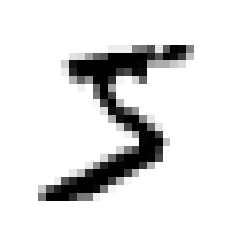

In [9]:
#wyswietlamy probke naszych danych uzywamy do tego matplotlib w odcieniak szarosci
plt.imshow(X_train[0],cmap='gray_r')
plt.axis('off')

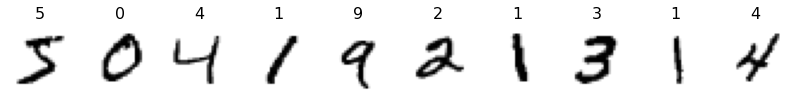

In [10]:
#teraz wyswietlmy sobie kilka danych z etykietami uzywajac plt oraz petli for
plt.figure(figsize=(14,14))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1],cmap='gray_r')
  plt.title(y_train[i-1],color='black', fontsize=16)
plt.show()

In [12]:
#dodajemy model ktory bedzie sekwencyjny
model = Sequential()
#nastepnie dodajemy do niego warstwy za pomoca cmd add
#splaszczona wartswa wejsciowa o rozmiarach 28x28 WAZNE
model.add(Flatten(input_shape=(28,28)))
#kolejna warstwa o 128 neuronach z funkcja aktywacji relu
model.add(Dense(units=128,activation='relu'))
#warstwa ukryta z dropout o parametrze 0.2 stopien straty aby nie zniwelowac przeuczenie
model.add(Dropout(0.2))
#warstwa ostatnia wyjsciowa o funkcji aktywacji softmax oraz co wazne liczba neuronow musi byc rowna liczbie klas. W naszym wypadku jest to 10. od 0-9 ( nasze liczby dane)
model.add(Dense(units=10,activation='softmax'))

In [13]:
#nastepnie nasz model musimy kompilować, wybieramy optymalizator w naszm przypadku bedzie to adam, nastepnie podajemy fukncje straty, ktora nasz optymalizator bedzie minimalizowal
#oraz metryke za pomoca ktroej bedziemy sprawdzac jak nasz model sobie radzi  czyli accuracy dokladnosc przewidywania i na koniec summary czyli wyswietli nam sie budowe modelu

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#budowa modelu
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
#nastepnie truenujemy nasz model za pomoca fit i przypisujemy do zmiennej history loos -->strata accuracy ---> dokladnosc 
history = model.fit(X_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9785
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0599 - accuracy: 0.9805
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0453 - accuracy: 0.9848


In [19]:
#podczas treningu uzywamy innych danych niz testowych, a podczas testu uzywamy danych ktorych model jeszcze nie widzial
#oceniamy nasz model
model.evaluate(X_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0690 - accuracy: 0.9798


[0.06899534910917282, 0.9797999858856201]

In [21]:
#mozemy sobie wyswietlic daene z naszej metryki za pomoca pd.DataFrame uzywajac do naszej przypisanej history, parametru .history czyli history.history
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.067083,0.978500
1,0.059886,0.980533
2,0.052481,0.982633
3,0.047889,0.984117
4,0.045329,0.984833


In [27]:
#nastepnie za pomoca plot mozemy wygenerowac wykres straty i dokladnosci naszych wartosci z modelu
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'],name='loss'),row=1,col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'],name='accuracy'),row=2,col=1)
fig.update_layout(width=800)


In [28]:
#teraz sprawdzamy prawdopodobienstwo przynaleznosci do danej klasy
model.predict(X_test)

array([[0.000000000003, 0.00000000052 , 0.000000042528, ..., 0.99999917    , 0.000000003274, 0.00000010093 ],
       [0.000000000001, 0.000000049684, 0.99999964    , ..., 0.            , 0.00000000001 , 0.            ],
       [0.000000018774, 0.99970216    , 0.0000671651  , ..., 0.00011170492 , 0.00010530309 , 0.000000003405],
       ...,
       [0.            , 0.000000000001, 0.            , ..., 0.000000009684, 0.000000002148, 0.000001025   ],
       [0.000000006889, 0.000000000029, 0.            , ..., 0.000000000084, 0.000001697398, 0.            ],
       [0.000000000012, 0.            , 0.000000004088, ..., 0.            , 0.000000000055, 0.            ]],
      dtype=float32)

In [33]:
# mozemy to sprawdzic z weiszka dokladnoscia ktora pokaze nam klase uzywamy do tego predict_classes
y_pred= model.predict_classes(X_test)
y_head

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



NameError: ignored

In [34]:
#teraz sprawdzimy nasze przewidywania porownujac do naszych danych treningowych uzywajac kolejny raz pd.DataFrame
pred=pd.concat([pd.DataFrame(y_test,columns=['y_test']),pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
pred.head(10)
#widzimy ze wszystko sie zgadza

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [38]:
#nie we wszystkich wystapi idelane dopasowanie, ponizej wyswietlimy probki gdzie nastapily pomylki i przypiszemy je do misclassified
misclassified = pred[pred['y_test'] != pred['y_pred']]
#wyswietlimy 10 pierwszych pomylek
misclassified.index[:10]

Int64Index([115, 151, 247, 321, 340, 381, 445, 447, 582, 591], dtype='int64')

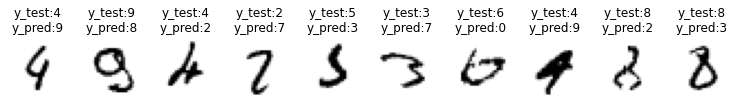

In [40]:
#obrazujemy bledne przewidzenia
plt.figure(figsize=(13,13))
for i,j in zip(range(1,11),misclassified.index[:10]):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_test[j],cmap='gray_r')
  plt.title('y_test:'+str(y_test[j])+ '\n' + 'y_pred:'+ str(y_pred[j]),color='black',fontsize=12)
plt.show()